# Задача 2 вариант 2

$p(\theta|\vec{X}) \propto p(\vec{X}|\theta)p(\theta) = p(\vec{X}|\theta) = \prod\theta(1-\theta)^{X_k-1} = \theta^n(1-\theta)^{\sum X_k-n}$

Таким образом, $\theta|\vec{X}\sim Beta(n+1, \sum X_k-n+1)$.

При MSE среднее - и есть argmax. 

Для $Beta(a, b)$ - это $\frac{a}{a+b}$. Таким образом, наиболее правдоподобное $\theta = \frac{n+1}{\sum X_k + 2}$

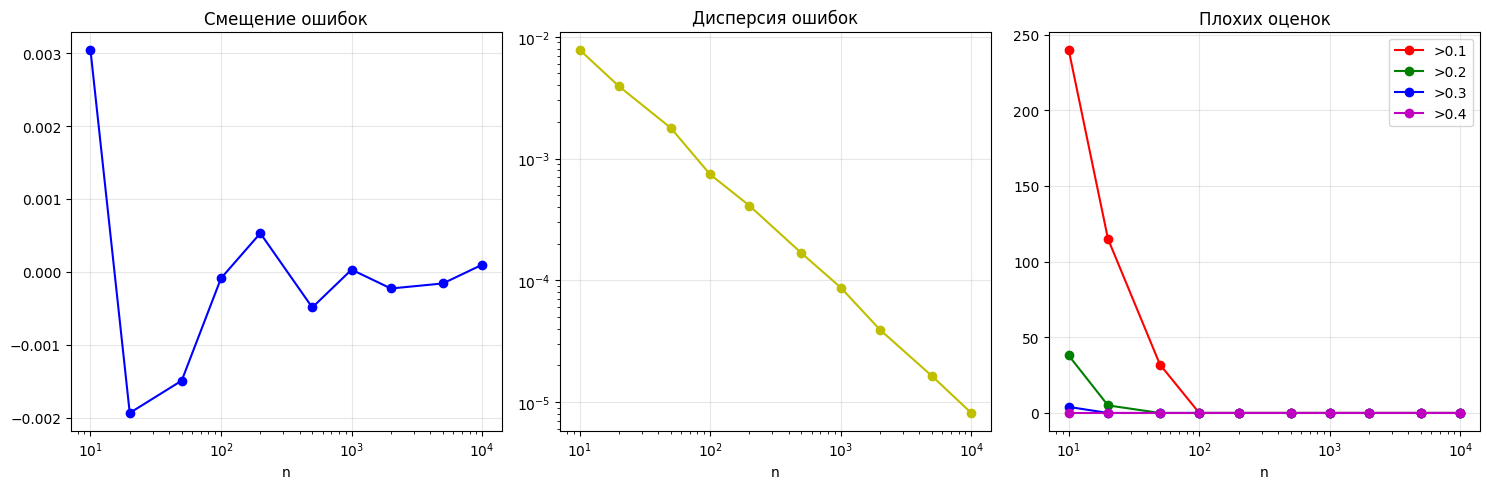

In [12]:
import numpy as np
import matplotlib.pyplot as plt

ns = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
m = 1000

theta_errors_means = []
theta_errors_vars = []
bad_sample_counts_01 = []
bad_sample_counts_02 = []
bad_sample_counts_03 = []
bad_sample_counts_04 = []

for n in ns:
    sample_thetas = []
    bayes_estimates = []
    
    for _ in range(m):
        true_theta = np.random.beta(a=1, b=1)
        samples = np.random.geometric(p=true_theta, size=n)
        sum_X = np.sum(samples)
        theta_hat = (n + 1) / (sum_X + 2)
        
        sample_thetas.append(true_theta)
        bayes_estimates.append(theta_hat)
    
    sample_thetas = np.array(sample_thetas)
    bayes_estimates = np.array(bayes_estimates)
    
    theta_errors = bayes_estimates - sample_thetas
    
    theta_errors_means.append(np.mean(theta_errors))
    theta_errors_vars.append(np.var(theta_errors))
    bad_sample_counts_01.append(np.sum(np.abs(theta_errors) > 0.1))
    bad_sample_counts_02.append(np.sum(np.abs(theta_errors) > 0.2))
    bad_sample_counts_03.append(np.sum(np.abs(theta_errors) > 0.3))
    bad_sample_counts_04.append(np.sum(np.abs(theta_errors) > 0.4))


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(ns, theta_errors_means, 'bo-')
plt.xscale('log')
plt.xlabel('n')
plt.title('Смещение ошибок')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(ns, theta_errors_vars, 'yo-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.title('Дисперсия ошибок')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(ns, bad_sample_counts_01, 'ro-', label='>0.1')
plt.plot(ns, bad_sample_counts_02, 'go-', label='>0.2')
plt.plot(ns, bad_sample_counts_03, 'bo-', label='>0.3')
plt.plot(ns, bad_sample_counts_04, 'mo-', label='>0.4')
plt.xscale('log')
plt.xlabel('n')
plt.title('Плохих оценок')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Вывод
Как видно по графикам, и дисперсия и смещение и количество ошибок стремятся к нулю при увеличении выборки. То есть $\widehat\theta - \theta \rightarrow 0$ (вырожденное распределение; стремление здесь как идея)

Получается работает приближение параметра как argmax(MSE) - по крайней мере в случае сочетания распределений из задания.

Большая выборка действительно дает больше информации о распределении (можно точнее определять параметр)